In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
import numpy as np
import pandas as pd

In [4]:
data = mnist.load_data()

In [5]:
(x_train, y_train),(x_test, y_test) = data 

In [6]:
import matplotlib.pyplot as plt

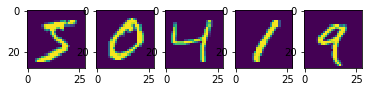

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=5)
for i in range(0, 5):
    ax[i].imshow(x_train[i])

In [8]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

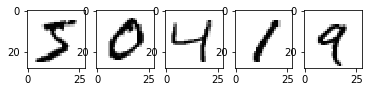

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=5)
for i in range(0, 5):
    ax[i].imshow(x_train[i], cmap=plt.cm.gray_r)

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Dropout
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Flatten

In [11]:
model = Sequential()

W0816 00:57:22.259950 140214219646784 deprecation_wrapper.py:119] From /home/zhenya/anaconda3/envs/python_3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [12]:
model.add(Conv2D(filters=32, 
                 kernel_size=(3,3), 
                 activation='relu', 
                 input_shape=(28, 28, 1)))

W0816 00:57:24.167676 140214219646784 deprecation_wrapper.py:119] From /home/zhenya/anaconda3/envs/python_3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0816 00:57:24.192411 140214219646784 deprecation_wrapper.py:119] From /home/zhenya/anaconda3/envs/python_3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [13]:
model.add(MaxPooling2D(pool_size=(2,2)))

W0816 00:57:25.212217 140214219646784 deprecation_wrapper.py:119] From /home/zhenya/anaconda3/envs/python_3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [14]:
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [15]:
#model.add(Dropout(0.25))
#model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
#model.add(MaxPooling2D(pool_size=(2,2)))

W0816 00:57:26.142090 140214219646784 deprecation_wrapper.py:119] From /home/zhenya/anaconda3/envs/python_3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0816 00:57:26.170372 140214219646784 deprecation.py:506] From /home/zhenya/anaconda3/envs/python_3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
model.add(Dense(10, activation='softmax'))

In [17]:
model.compile(optimizer='adam', loss="MSE", metrics=["accuracy"])

W0816 00:57:29.287467 140214219646784 deprecation_wrapper.py:119] From /home/zhenya/anaconda3/envs/python_3/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [18]:
x_train = x_train / 255.0

In [19]:
X_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 
                x_train.shape[2], 1)

In [20]:
X_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 
                x_test.shape[2], 1)

In [22]:
Y_train = y_train.reshape(y_train.shape[0], 1)

In [23]:
Y_train.shape

(60000, 1)

In [24]:
model.fit(x = X_train,
          y = to_categorical(Y_train, 10),
          batch_size=32, 
          epochs=5, 
          verbose=1)

W0816 00:57:39.054771 140214219646784 deprecation_wrapper.py:119] From /home/zhenya/anaconda3/envs/python_3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/5
60000/60000 [==============================] - 36s 605us/step - loss: 0.0643 - acc: 0.4723
Epoch 2/5
60000/60000 [==============================] - 36s 601us/step - loss: 0.0475 - acc: 0.5741
Epoch 3/5
60000/60000 [==============================] - 35s 579us/step - loss: 0.0380 - acc: 0.6802
Epoch 4/5
60000/60000 [==============================] - 32s 534us/step - loss: 0.0266 - acc: 0.7939
Epoch 5/5
60000/60000 [==============================] - 35s 577us/step - loss: 0.0231 - acc: 0.8256


In [0]:
from sklearn.metrics import accuracy_score

In [0]:
prediction = model.predict(X_test)

In [35]:
prediction[0]

array([1.2671662e-03, 1.5383557e-04, 2.1344200e-03, 2.5512830e-03,
       1.9666650e-03, 2.0728298e-03, 1.0903900e-03, 1.2280359e-01,
       1.5938010e-03, 8.6436599e-01], dtype=float32)

In [1]:
#pred = [1 if (x > 0.5) else 0 for x in prediction]

In [0]:
pred = [np.where(prediction[i] == prediction[i].max())[0][0] for i in range(len(prediction))]

In [49]:
accuracy_score(pred, y_test)

0.8835

In [0]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
input_shape

(28, 28, 1)